# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below to import the dataset

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_dataset.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [3]:
df['quality rating'].unique()

array([ 6,  7,  4,  8,  3,  1,  2, 10,  5,  9])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fixed acidity         100000 non-null  float64
 1   volatile acidity      100000 non-null  float64
 2   citric acid           100000 non-null  float64
 3   residual sugar        100000 non-null  float64
 4   chlorides             100000 non-null  float64
 5   free sulfur dioxide   100000 non-null  float64
 6   total sulfur dioxide  100000 non-null  float64
 7   density               100000 non-null  float64
 8   sulphates             100000 non-null  float64
 9   alcohol               100000 non-null  float64
 10  quality rating        100000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 8.4 MB


❓ Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [5]:
df['quality rating']= df['quality rating'].apply(lambda x: 0 if x<6 else 1)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,1
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,1
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,0
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,1
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,0


❓ Check the class balance of the new binary target

In [7]:
df['quality rating'].value_counts()

0    50010
1    49990
Name: quality rating, dtype: int64

<AxesSubplot:xlabel='quality rating', ylabel='count'>

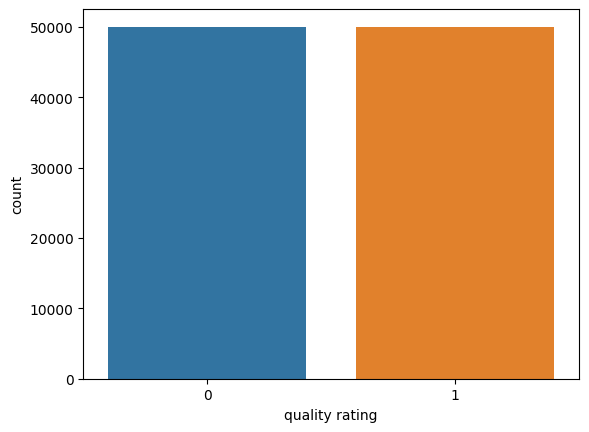

In [8]:
sns.countplot(x= 'quality rating', data=df)

❓ Create your `X` by normalising the features. This will allow for fair comparison of different solvers.

In [9]:
X= df.drop(columns='quality rating')

In [10]:
mmx_scaler= MinMaxScaler()
X_scaled= pd.DataFrame(mmx_scaler.fit_transform(X), columns= X.columns)

In [11]:
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.531348,0.285244,0.265966,0.504968,0.229879,0.363248,0.451878,0.432173,0.557503,0.413523
1,0.576803,0.420113,0.459984,0.343270,0.412348,0.123932,0.442488,0.370948,0.435926,0.413523
2,0.619122,0.507989,0.547292,0.577236,0.350606,0.498932,0.649061,0.639856,0.667032,0.432028
3,0.651254,0.401316,0.343573,0.457995,0.286659,0.552350,0.122066,0.618247,0.592552,0.419929
4,0.739028,0.636278,0.507680,0.485095,0.464168,0.387821,0.503521,0.374550,0.266156,0.597153


## 2. LogisticRegression solvers

❓ Logistic Regression models can be optimized using different **solvers**. Make a comparison of the available solvers':
- Fit time - which solver is **the fastest**?
- Precision - **how different** are their respective precision scores?

Available solvers for Logistic Regression are `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this Stack Overflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [12]:
y= df['quality rating']

In [18]:
# solver= newton-cg
log_model_newt= LogisticRegression(solver='newton-cg')
y_pred_newt= cross_val_predict(log_model_newt, X_scaled, y, cv=5)
cv_newt= cross_validate(log_model_newt, X_scaled, y, cv=5)
fit_time_newt= cv_newt['fit_time'].mean()
prec_newt= precision_score(y, y_pred_newt)
print ('fit_time =' , fit_time_newt, 'precision_newt=', prec_newt)

fit_time = 0.17955899238586426 precision_newt= 0.8743780063028694


In [19]:
# solver= lbfgs
log_model_lbfgs= LogisticRegression(solver='lbfgs')
y_pred_lbfgs= cross_val_predict(log_model_lbfgs, X_scaled, y, cv=5)
cv_lbfgs= cross_validate(log_model_lbfgs, X_scaled, y, cv=5)
fit_time_lbfgs= cv_lbfgs['fit_time'].mean()
prec_lbfgs= precision_score(y, y_pred_lbfgs)
print ('fit_time =' , fit_time_lbfgs, 'precision_newt=', prec_lbfgs)

fit_time = 0.22420425415039064 precision_newt= 0.8743806107851471


In [20]:
# solver= liblinear
log_model_lib= LogisticRegression(solver='liblinear')
y_pred_lib= cross_val_predict(log_model_lib, X_scaled, y, cv=5)
cv_lib= cross_validate(log_model_lib, X_scaled, y, cv=5)
fit_time_lib= cv_lib['fit_time'].mean()
prec_lib= precision_score(y, y_pred_lib)
print ('fit_time =' , fit_time_lib, 'precision_newt=', prec_lib)

fit_time = 0.19346513748168945 precision_newt= 0.8744423463988547


In [21]:
# solver= sag
log_model_sag= LogisticRegression(solver='sag')
y_pred_sag= cross_val_predict(log_model_sag, X_scaled, y, cv=5)
cv_sag= cross_validate(log_model_sag, X_scaled, y, cv=5)
fit_time_sag= cv_sag['fit_time'].mean()
prec_sag= precision_score(y, y_pred_sag)
print ('fit_time =' , fit_time_sag, 'precision_newt=', prec_sag)

fit_time = 0.27065219879150393 precision_newt= 0.87431592039801


In [22]:
# solver= saga
log_model_saga= LogisticRegression(solver='saga')
y_pred_saga= cross_val_predict(log_model_saga, X_scaled, y, cv=5)
cv_saga= cross_validate(log_model_saga, X_scaled, y, cv=5)
fit_time_saga= cv_saga['fit_time'].mean()
prec_saga= precision_score(y, y_pred_saga)
print ('fit_time =' , fit_time_saga, 'precision_newt=', prec_saga)

fit_time = 0.44657559394836427 precision_newt= 0.8743780063028694


In [23]:
# YOUR ANSWER
fastest_solver = "newton-cg"

<details>
    <summary>ℹ️ Click here for our interpretation</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function.

**The wine dataset**
    
If you check feature importance with sklearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html">permutation_importance</a> on the current dataset, you'll see many features result in almost 0 importance. Liblinear solver successively moves only along *one* direction at a time, regularizing the others with L1 regularization (a.k.a, setting their beta to 0), which might provide a good fit for a dataset where many features are not that important in predicting the target.

❗️There is a cost to searching for the best solver. Sticking with the default (`lbfgs`) may save the most time overall, sklearn provides you this grid for an idea of which solver to choose to start off with: 

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers-chart.png" width=700>



</details> 

###  🧪 Test your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'solvers',
    fastest_solver=fastest_solver
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/04-Under-the-hood/data-solvers/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_solvers.py::TestSolvers::test_fastest_solver PASSED                 [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master



## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

❓ Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [ ]:
# YOUR CODE HERE

☝️ The SGD model should have one of the shortest times (maybe even shorter than `liblinear`), for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single row as opposed to loading 100k rows into memory at a time.

## 4. Predictions

❓ Use the best model (balanced with short fit time and high precision) to predict the binary quality (0 or 1) of the following wine. Store your:
- `predicted_class`
- `predicted_proba_of_class` (i.e if your model predicted a class of 1 what is the probability it believes 1 to be the class should be between 0 and 1)

In [ ]:
new_wine = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/solvers_new_wine.csv')
new_wine

In [ ]:
# YOUR CODE HERE

# 🏁  Check your code and push your notebook

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())